# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [2]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [3]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [4]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        self.Qs = {}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        choice = None
        if stateStr not in self.Qs.keys():
            self.Qs[stateStr] = np.zeros(self.num_actions)
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice == 1:
            action = np.random.randint(0, self.num_actions) 
        else:
            q_values = self.Qs[stateStr]
            action = np.random.choice(np.where(q_values == max(q_values))[0]) 
            
        ## TODO 2
        ## Implement epsilon greedy policy here
        
        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here
        
        self.Qs[state1Str][action1] = self.Qs[state1Str][action1] + self.alpha * (reward + self.gamma * self.Qs[state2Str][action2]-self.Qs[state1Str][action1])

In [ ]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

In [ ]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(100, interactive)

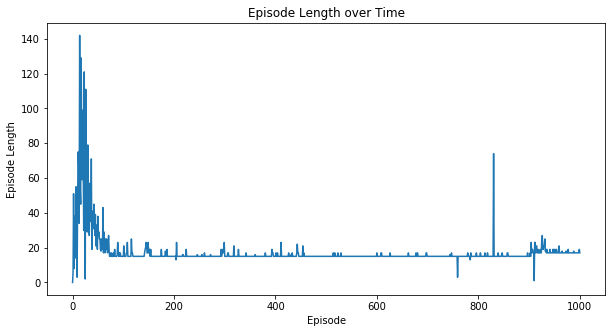

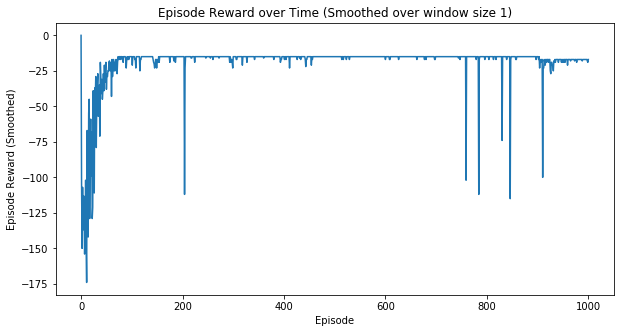

In [7]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(1000, interactive)

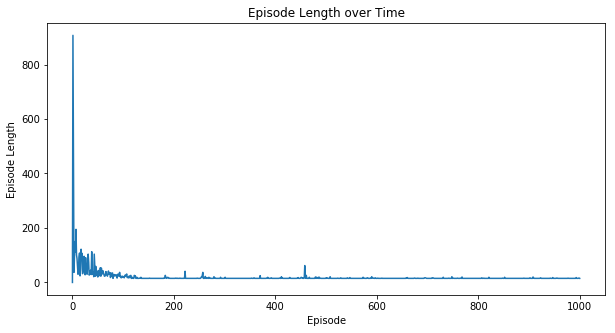

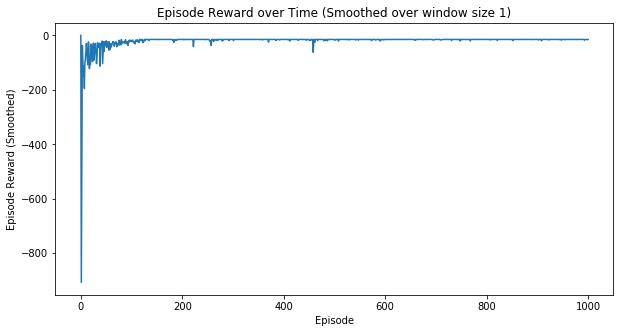

In [5]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(1000, interactive)